In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\Data Analysis Projects\ads click through rate prediction\ad_data.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [3]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 1: "Yes"})

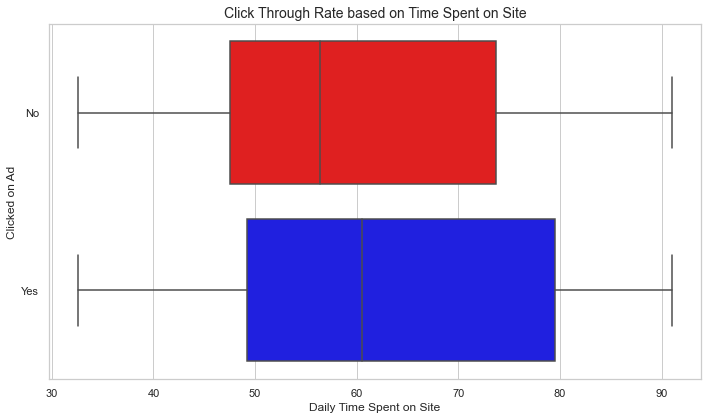

In [4]:
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x="Daily Time Spent on Site",y="Clicked on Ad",palette={'Yes': 'blue', 'No': 'red'},orient='h')

# Set the title and labels
plt.title("Click Through Rate based on Time Spent on Site", fontsize=14)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Clicked on Ad")

plt.tight_layout()
plt.show()

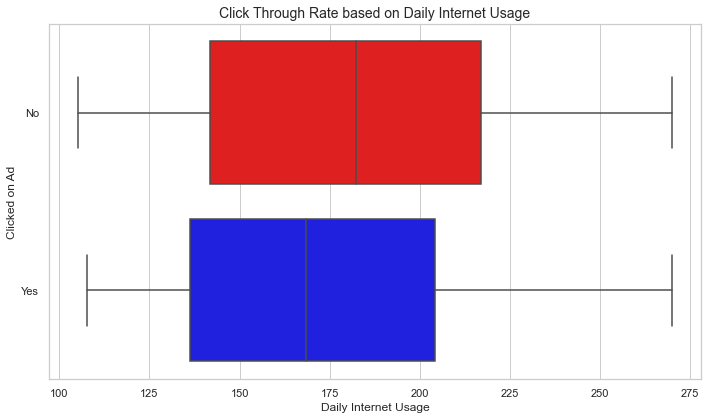

In [6]:
# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x="Daily Internet Usage",y="Clicked on Ad",palette={'Yes': 'blue', 'No': 'red'},orient='h')

# Titles and labels
plt.title("Click Through Rate based on Daily Internet Usage", fontsize=14)
plt.xlabel("Daily Internet Usage")
plt.ylabel("Clicked on Ad")

plt.tight_layout()
plt.show()

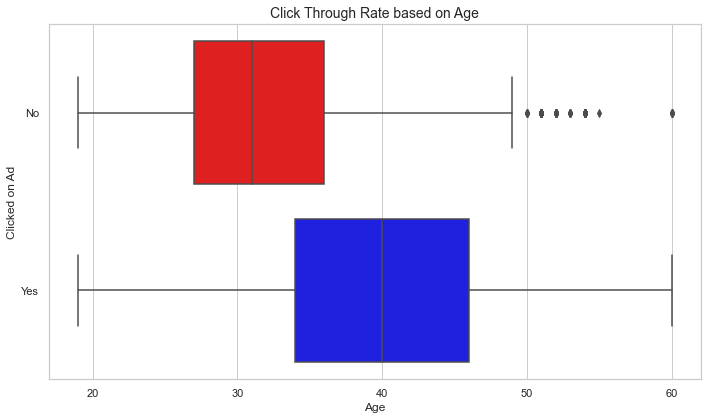

In [7]:
# Set style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,x="Age",y="Clicked on Ad",palette={'Yes': 'blue', 'No': 'red'},orient='h')

# Titles and labels
plt.title("Click Through Rate based on Age", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Clicked on Ad")

plt.tight_layout()
plt.show()

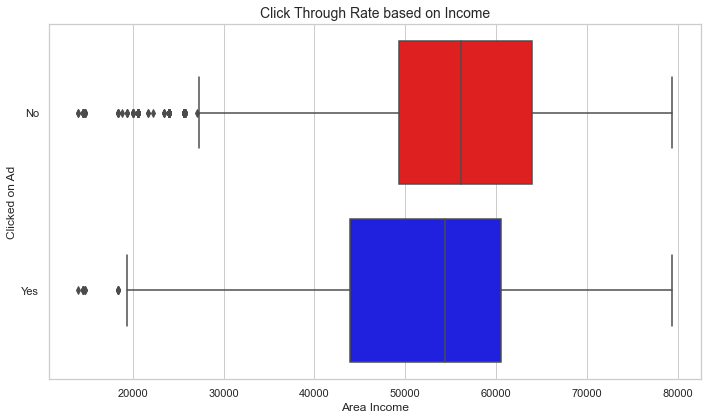

In [8]:
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data,
            x="Area Income",
            y="Clicked on Ad",
            palette={'Yes': 'blue', 'No': 'red'},
            orient='h')

# Set title and labels
plt.title("Click Through Rate based on Income", fontsize=14)
plt.xlabel("Area Income")
plt.ylabel("Clicked on Ad")

plt.tight_layout()
plt.show()

#### Calculating CTR of Ads

In [9]:
data["Clicked on Ad"].value_counts()

No     5083
Yes    4917
Name: Clicked on Ad, dtype: int64

In [10]:
click_through_rate = 4917 / 10000 * 100
print(click_through_rate)

49.17


### Click Through Rate Prediction Model

In [11]:
data["Gender"] = data["Gender"].map({"Male": 1,"Female": 0})

x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

In [15]:
y_pred = model.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.9615


In [18]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = np.array([[a, b, c, d, e]])
print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 68.55
Age: 35
Area Income: 62000
Daily Internet Usage: 256
Gender (Male = 1, Female = 0) : 1
Will the user click on ad =  ['Yes']
